In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils_script import *
from sklearn.metrics import precision_recall_curve,roc_curve, auc
import os
os.chdir("..")
from models.decode_utils import *
import torch
from tqdm import tqdm

In [2]:
module = torch.jit.load("/data1/YHC/Mod_save/trace_scirpt_module_half_acc:0.9587.pt")
# module = module.cuda(1)

module = module.cuda()

In [3]:
arr = np.load("/data1/YHC/QiTan_data/Mod/test/test.npy")

In [4]:
kmers = torch.tensor(arr[:, :21].reshape(-1, 21)).long()
signals = torch.tensor(arr[:, 21:-1].reshape(-1,21,19)).float()
labels = arr[:,-1].astype(int)

In [5]:
probs = []
batch_size = 128
for i in tqdm(range(0, len(labels), batch_size)):
    kmer = kmers[i : i + batch_size].cuda(0).to(torch.int32)
    signal = signals[i : i + batch_size].cuda(0).to(torch.float16)
    _, prob = module(kmer, signal)
    probs.append(prob.detach().cpu().numpy())

100%|██████████| 57231/57231 [01:07<00:00, 849.16it/s]


In [6]:
probs_ = np.concatenate(probs, axis=0)

In [7]:
preds = probs_.argmax(1, keepdims=True).reshape(-1)

In [8]:
TP, FP, TN, FN = compute(preds, labels)
TP,FP,TN,FN, estimate_scores(TP,FP,TN,FN)

100%|██████████| 7325494/7325494 [00:02<00:00, 3404017.04it/s]


(3438657,
 113932,
 3548815,
 224090,
 (0.953856763789582,
  0.9679298674853748,
  0.9388191431185392,
  0.9688943844606248,
  0.9531522856316047,
  0.031105615539375228,
  0.06118085688146083,
  0.9081243288680426))

In [9]:
fpr, tpr, thresholds = roc_curve(labels, probs_[:,1])
roc_auc = auc(fpr, tpr)

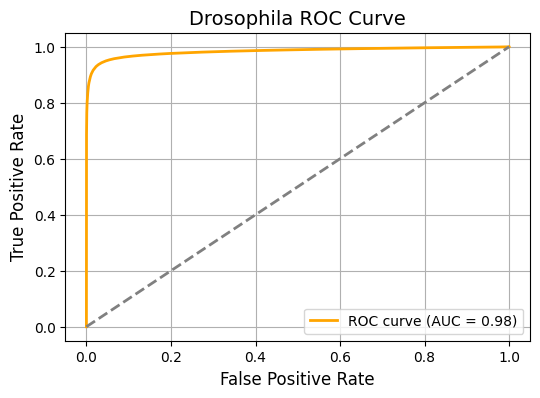

In [12]:
# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Drosophila ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("fig4_1", dpi=400, bbox_inches="tight")
plt.show()

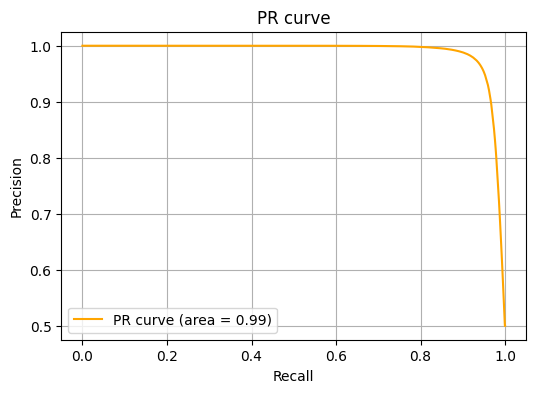

In [13]:
# 计算precision, recall和thresholds
precision, recall, thresholds = precision_recall_curve(labels, probs_[:,1])

# 计算PR曲线下的AUC值
pr_auc = auc(recall, precision)

# 绘制PR曲线
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='orange', label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.grid(True)
plt.legend(loc="lower left")
plt.savefig("fig4_2", dpi=400, bbox_inches="tight")
plt.show()

In [13]:
print(roc_auc, pr_auc)

0.983500790346298 0.9879464231310243


In [24]:
input = torch.rand(10, 10)
torch.sum(nn.Dropout(p=0.1)(input) - input), torch.sum(input)

(tensor(-0.1314), tensor(56.0258))

In [15]:
input

tensor([[3.7105e-01, 5.8566e-01, 1.7268e-01, 5.1993e-01, 7.0300e-01, 5.8614e-01,
         4.6024e-01, 6.8329e-01, 4.5483e-01, 2.2329e-02],
        [8.4082e-01, 7.0385e-02, 4.0542e-01, 7.7976e-01, 7.8540e-01, 6.5081e-01,
         8.0878e-01, 3.8133e-01, 6.2673e-01, 3.5497e-02],
        [9.1881e-01, 2.2235e-02, 1.2562e-01, 2.2350e-01, 8.7678e-01, 6.6857e-01,
         7.5143e-01, 9.2654e-01, 2.2030e-01, 6.4273e-01],
        [1.3346e-01, 6.7200e-01, 5.3004e-01, 6.3301e-01, 9.2591e-01, 4.3462e-02,
         8.9779e-01, 5.2820e-01, 7.5199e-01, 7.7577e-01],
        [5.0395e-01, 5.6411e-02, 5.9365e-01, 6.4587e-01, 1.9772e-01, 5.4181e-01,
         5.6155e-01, 9.5572e-01, 2.3614e-01, 1.5647e-01],
        [4.5023e-01, 3.2037e-02, 5.2238e-01, 1.4514e-01, 9.2687e-01, 1.3708e-01,
         3.7260e-01, 7.6278e-01, 8.7152e-01, 9.6681e-01],
        [4.3042e-02, 9.8011e-01, 8.3015e-01, 9.0424e-01, 8.4185e-01, 2.2547e-02,
         3.1405e-01, 4.7960e-01, 9.8749e-01, 2.0822e-01],
        [2.1256e-01, 5.5757